# 前馈神经网络

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

步骤 1: 加载 MNIST 数据集
MNIST 是一个包含手写数字图像的数据集，共有 70000 张 28x28 像素的灰度图像，分为 60000 张训练图像和 10000 张测试图像

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# 打印数据的形状
print("训练集图像数据形状:", train_images.shape)
print("训练集标签数据形状:", train_labels.shape)
print("测试集图像数据形状:", test_images.shape)
print("测试集标签数据形状:", test_labels.shape)

训练集图像数据形状: (60000, 28, 28)
训练集标签数据形状: (60000,)
测试集图像数据形状: (10000, 28, 28)
测试集标签数据形状: (10000,)


步骤 2: 数据预处理
图像像素值的范围是 0 - 255，将其除以 255 进行归一化处理，使像素值范围变为 0 - 1，有助于模型收敛

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

步骤 3: 将标签进行 one - hot 编码
one - hot 编码将每个标签转换为一个长度为 10 的向量，对应 0 - 9 这 10 个数字

In [4]:
train_labels = np.eye(10)[train_labels]
test_labels = np.eye(10)[test_labels]

步骤 4: 构建前馈神经网络模型
使用 tf.keras.Sequential 来构建一个顺序模型，模型中的各层会按顺序依次执行

In [5]:
model = tf.keras.Sequential([
    # Flatten 层用于将输入的 28x28 二维图像展平为一维向量，长度为 28 * 28 = 784
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 全连接层，包含 128 个神经元，使用 ReLU 作为激活函数
    tf.keras.layers.Dense(128, activation='relu'),
    # 输出层，包含 10 个神经元，对应 0 - 9 这 10 个数字类别
    # 使用 softmax 激活函数，将输出转换为概率分布，每个元素表示对应类别的概率
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\13619\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


步骤 5: 编译模型
编译模型时需要指定优化器、损失函数和评估指标
优化器用于更新模型的参数，这里使用 Adam 优化器，它结合了 AdaGrad 和 RMSProp 的优点，能自适应调整学习率
损失函数用于衡量模型预测结果与真实标签之间的差异，对于多分类问题，使用 categorical_crossentropy 损失函数
评估指标用于在训练和测试过程中监控模型的性能，这里使用准确率（accuracy）

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

步骤 6: 训练模型
fit 方法用于训练模型，传入训练数据、训练标签、训练轮数（epochs）和批次大小（batch_size）
epochs 表示模型将对整个训练数据集进行多少次迭代训练
batch_size 表示每次训练时使用的样本数量，模型会将训练数据分成多个批次进行训练
validation_data 参数用于在训练过程中同时评估模型在验证集上的性能

In [7]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8601 - loss: 0.5055 - val_accuracy: 0.9528 - val_loss: 0.1625
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9582 - loss: 0.1438 - val_accuracy: 0.9671 - val_loss: 0.1113
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9730 - loss: 0.0944 - val_accuracy: 0.9710 - val_loss: 0.0966
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9796 - loss: 0.0719 - val_accuracy: 0.9717 - val_loss: 0.0867
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9837 - loss: 0.0551 - val_accuracy: 0.9756 - val_loss: 0.0775


步骤 7: 评估模型
evaluate 方法用于在测试集上评估模型的性能，返回损失值和评估指标值

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9727 - loss: 0.0870
Test accuracy: 0.975600004196167


步骤 8: 可视化训练过程

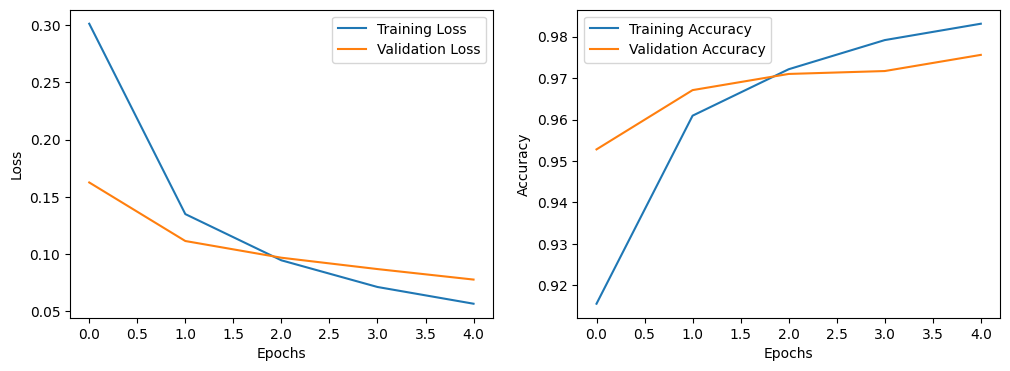

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

步骤 9: 随机抽取 10 个样本进行验证

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


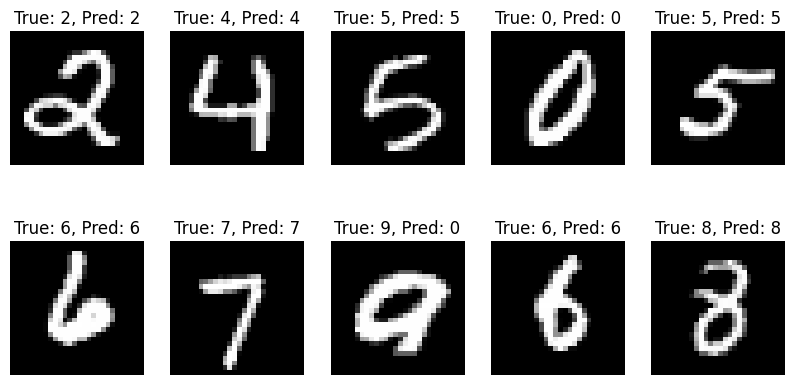

In [10]:
# 随机选择 10 个测试样本的索引
random_indices = np.random.choice(len(test_images), 10, replace=False)
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

# 进行预测
predictions = model.predict(random_test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(random_test_labels, axis=1)

# 可视化随机抽取的 10 个样本及其预测结果
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_test_images[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.show()
    